In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('sonar_eda.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [4]:
X = df.drop(labels='Label', axis=1)
y = df['Label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 141, X_test size: 67
y_train size: 141, y_test size: 67


In [6]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [
    ('scaler', scaler),
    ('knn', knn)
]

In [7]:
pipe = Pipeline(steps=operations)

In [8]:
param_grid = {
    'knn__n_neighbors': range(1, 31)
}

0.8238095238095238
{'knn__n_neighbors': 1}
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])


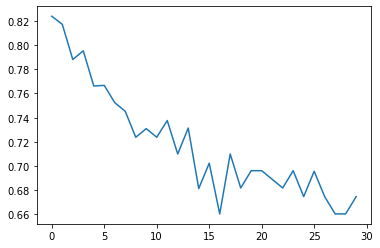

In [13]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
                )
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
pd.DataFrame(grid_search.cv_results_)['mean_test_score'].plot();

Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.89      0.93        38

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



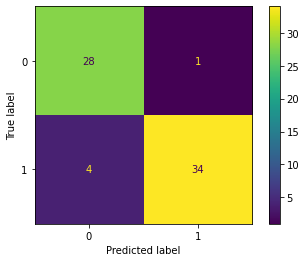

In [73]:
y_pred = grid_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(classification_report(y_true=y_test, y_pred=y_pred))
plot_confusion_matrix(
    estimator=grid_search,
    X=X_test,
    y_true=y_test
);

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       111

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



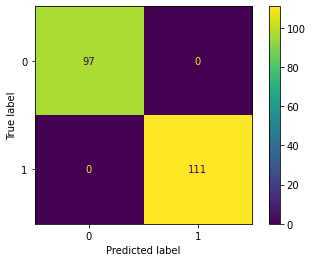

In [74]:
final_model = grid_search.fit(X, y)
y_hat = grid_search.predict(X)
print(f'Accuracy: {accuracy_score(y_true=y, y_pred=y_hat)}')
print(classification_report(y_true=y, y_pred=y_hat))
plot_confusion_matrix(
    estimator=final_model,
    X=X,
    y_true=y
);

In [75]:
df['Predicted'] = y_hat
missed = df[df['Label'] != df['Predicted']].index
df.iloc[missed]

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Predicted
